### Import Library

In [1]:
import pandas as pd                               
import matplotlib.pyplot as plt                   
import seaborn as sns                             
from sklearn.cluster import KMeans                
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import silhouette_score      
from sklearn.preprocessing import StandardScaler

### Prepare Data

In [2]:
test_features = pd.read_csv('test_features.csv')
test_labels = pd.read_csv('test_labels.csv')

test_features = test_features[['Age','Fare']]

test_features = pd.DataFrame(
    StandardScaler().fit_transform(test_features),
    columns=test_features.columns)
y=test_labels.Survived
test_features.head(10)

#from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler(feature_range=(0,10))

,Age,Fare
0,-0.049184,-0.392468
1,0.050792,-0.513112
2,-0.794584,-0.578571
3,-1.870518,0.058863
4,-1.255699,-0.494257
5,-0.333470,1.224421
6,-0.049184,-0.583020
7,-1.101994,-0.322453
8,-1.101994,-0.583020
9,-0.871437,-0.111883


### K-Means Clustering

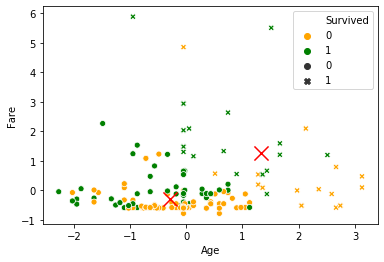

In [3]:
km = KMeans(
    n_clusters=2,
    random_state=1,
    init='k-means++',
    n_init=10)

km.fit(test_features)

sns.scatterplot(
    x='Age', 
    y='Fare',
    data=test_features, 
    hue=y,
    style=km.labels_,
    palette=["orange", "green"])

plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')